# Statistics

##### General notes
* Correlation does not imply causation!

### Mean, median, mode

In [21]:
# import declarations
import statistics as stats
import pandas as pd
import numpy as np

In [7]:
numbers_list = [1,1,2,4,10000]

In [8]:
# the middle number positionally is the median
# if the set is even-numbered, the mean of the two middle numbers is taken.
stats.median(numbers_list)

2

In [9]:
# the mean
stats.mean(numbers_list)

2001.6

In [10]:
# the mode is the value in the distribution with the most frequency
stats.mode(numbers_list)

1

### Create the Standard Normal Distribtuion

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [12]:
mean = 0
standard_dev = 1

In [13]:
# numpy ndarrray made via np.arange() from -10 to 10 with .0001 spacing
# between values
range = np.arange(-10, 10, 0.01)
range

array([-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99])

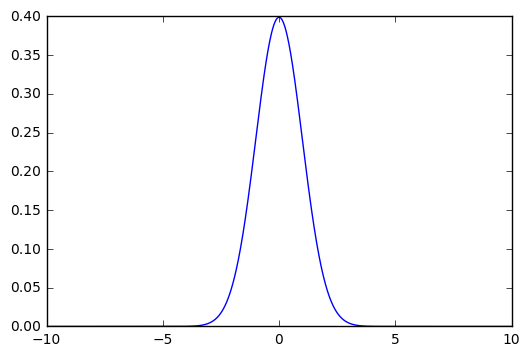

In [14]:
# plt.plot is the matplotlib plot function
# range sets the x-axis
# SciPy's norm.pdf() distribution values
my_plot = plt.plot(range, norm.pdf(range, mean, standard_dev))

In [15]:
# but what does the norm.pdf function return?
x = norm.pdf(range,mean,standard_dev)

In [16]:
# it's an ndarray
print(type(x))

<class 'numpy.ndarray'>


In [17]:
# with 1 dimension
x.ndim

1

I want to see the whole 1D ndarray. If it's acting as y-axis values, it should have a range from 0.0 to 0.4 given the graph ranges from 0.0 to 0.4.

In [18]:
# use np.savetxt() function to throw ndarray into csv
np.savetxt("x-ndarray.csv", x, delimiter=",")

Indeed, opening this file shows that values range from approximately 7.69 x 10^(-23) to 0.39.

Important note, the values in x are normally distributed via the norm.pdf function. So the values surrounding closer to the mean of 0.0 will be more numerous that those around the tail. Those more numerous values are closer to 0.39 than those in the tails.

I don't know why values only go to approximately 0.4

### Manual Standard Deviation from Already Grouped Data

In [22]:
# from grouped data
interval = ['0-5 sec','5-10 sec','10-15 sec','15-20 sec','20-25 sec','25-30 sec','30-35 sec','35-40 sec','More than 40 sec']
grouped_values = [40098,52420,48947,23050,11958,4927,3047,1930,3897]
midpoint = [2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5]

grouped_data = pd.DataFrame({'Interval':interval,
                             'Midpoint xj':midpoint,
                             'f':grouped_values})
grouped_data

,Interval,Midpoint xj,f
0,0-5 sec,2.5,40098
1,5-10 sec,7.5,52420
2,10-15 sec,12.5,48947
3,15-20 sec,17.5,23050
4,20-25 sec,22.5,11958
5,25-30 sec,27.5,4927
6,30-35 sec,32.5,3047
7,35-40 sec,37.5,1930
8,More than 40 sec,42.5,3897


In [23]:
# add all other columns
for row in grouped_data:
    grouped_data['xj*f'] = grouped_data['Midpoint xj'] * grouped_data['f']
    grouped_data['xj^2'] = grouped_data['Midpoint xj']**2
    grouped_data['xj^2*f'] = grouped_data['xj^2'] * grouped_data['f']
grouped_data

,Interval,Midpoint xj,f,xj*f,xj^2,xj^2*f
0,0-5 sec,2.5,40098,100245.0,6.25,250612.50
1,5-10 sec,7.5,52420,393150.0,56.25,2948625.00
2,10-15 sec,12.5,48947,611837.5,156.25,7647968.75
3,15-20 sec,17.5,23050,403375.0,306.25,7059062.50
4,20-25 sec,22.5,11958,269055.0,506.25,6053737.50
5,25-30 sec,27.5,4927,135492.5,756.25,3726043.75
6,30-35 sec,32.5,3047,99027.5,1056.25,3218393.75
7,35-40 sec,37.5,1930,72375.0,1406.25,2714062.50
8,More than 40 sec,42.5,3897,165622.5,1806.25,7038956.25


Variance is sigma^2 = (sum of x values squared times their respective frequency, all divided by n) - little x-bar^2

In [25]:
# Mean
mean = grouped_data['xj*f'].sum()/grouped_data['f'].sum()
mean

11.82599829719247

In [26]:
# Standard Deviation
import math as math

variance = (grouped_data['xj^2*f'].sum()/grouped_data['f'].sum()) - mean**2
sqrt = math.sqrt(variance)
sqrt

8.592104638868701

### Conduct a Pooled-Variance t Test with Confidence Intervals

This allows for inference between two populations with variances assumed to be equal. The pooled-variance t procedures assume:

##### Question:
In 2001 in Croatia there was a large increase in the proportion of veterans claiming PTSD. Studies showed a high proportion were malingering (fabricating or exaggerating), possibly to gain compensation available due to new government policies. The Morel Emotional Numbing Test (MENT) was designed as a diagnostic tool to help differentiate between those who truly had PTSD and those who were malingering.

*A box plot reveals that people seeking compensation appear to have higher scores on the MENT on average than those seeking treatment.*

But is it a significant difference? Are we unlikely to observe a difference of this size due to chance alone? Is there strong evidence that the population mean of group 1 ,$\mu_1$, is not equal to the population mean of group 2, $\mu_2$? How much on average do the two population means differ?

##### Test assumptions:

INDEPENDENT RANDOM SAMPLES: We will need to exercise some caution in our conclusions here. These were samples taken in Croatia, so our conclusions really only apply to those claiming post traumatic stress disorder there. Also, they were not truly random samples from the populations. These were people seeking medical treatment at a clinic and agreed to participate in this study. So we never truly know what biases may have introduced by this sampling design. 

NORMALLY DISTRIBUTED: *A Normal Q-Q plot shows both the seeking compensation and seeking treatment samples appear to be normally distributed.* The Normal Q-Q plot checks out. Good to go on this.

EQUAL POPULATION VARIANCES: Note, the sample standard deviations are different, but they're reasonably close. It seems reasonable to use the pooled-variance t procedure here. 

##### Parameters:
Let X = the compensation group scores on the MENT

Let Y = the treatment group scores on the MENT

Let $t^*=t_{n_1-n_2-2\text{, } 0.025}$

Compensation group: $\bar{x} = 9.76$, $\hat{s}_x = 4.90$, $n_x = 49$

Treatment group: $\bar{y} = 6.48$, $\hat{s}_y = 3.49$, $n_y = 70$

We have SMALL samples, and only point-estimates for population paramters. The standardized estimator and distribution for $\mu_x - \mu_y$ is:

$$\frac{\bar{X}-\bar{Y} - (\mu_x-\mu_y)}{\hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}} \sim t^*$$

##### Initial Calculations:
Pooled variance: A weighted average of the individual samples' variances. Pooled sample variance for the unbiased estimator is denoted $s_p^2$. 

$$ \hat{s}_p^2 = \frac{(n_x-1)\hat{s}_x^2+(n_y-1)\hat{s}_y^2}{n_x+n_y-2}$$

Here we have:
$$ \hat{s}_p^2 = \frac{(49-1)4.90^2+(70-1)3.49^2}{49+70-2}$$

$$=17.033$$

Standard error of the estimator: The standard error of the sample means. We can use the standard error in our inference procedure calculations.

$$SE(\bar{x} - \bar{y}) = \hat{s}_p\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}$$

Here we have:

$$SE(\bar{x} - \bar{y}) = \sqrt{17.033}\sqrt{\frac{1}{49}+\frac{1}{70}}$$

$$=0.7687$$

Degrees of freedom: based on sizes of samples.

$$DF = n_x+n_y-2$$

Here we have: $$DF = 49+70-2 = 117 \text{ degrees of freedom}$$

117 degrees of freedom corresponds to a t statistic of 1.980.

##### Hypothesis test:
Create a decision rule to either reject the null hypothesis or fail to reject the null hypothesis using a 95% confidence interval for the difference between $\bar{x}$ and $\bar{y}$.
$$H_0:\mu_x=\mu_y \text{ versus } H_1:\mu_x \ne \mu_y$$

There is a 5% probability that we reject the null hypothesis given the null hypothesis is true:
$$0.05 = P(\text{reject }H_0|H_0\text{ is true})$$

Focusing only on the interval for which $H_0$ could be rejected in a two-tailed hypothesis test we have the absolute value of the $t$ statistic greater than $t^*$.
$$= P(|t| > t^*)$$

Now showing $t$ as the standardized estimator:
$$=P \left( \left| \frac{\bar{X}-\bar{Y} - (\mu_x-\mu_y)}{\hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}} \right| > t^* \right)$$

Note $\mu_x - \mu_y$ has a hypothesized value of zero:

$$=P \left( \left| \frac{\bar{X}-\bar{Y} - (0)}{\hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}} \right| > t^* \right)$$

$$=P \left( \left| \bar{X}-\bar{Y} \right| > t^* * \hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}\right)$$

So we have two areas of focus on the t-distribution:

$$\bar{X}-\bar{Y} < -t^* * \hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}} \text{ OR } \bar{X}-\bar{Y} > t^* * \hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}$$

Our decision rule is to reject the null hypothesis $H_0$ if:
$$\bar{X}-\bar{Y} \notin \left(-t^* * \hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}} \text{ , } t^* * \hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}} \right)$$

Using our calculations for the appropriate degrees of freedom and the standard error of the estimator we have approximations of:

$$\bar{X}-\bar{Y} \notin \left(-1.980 * 0.7687 \text{ , } 1.980 * 0.7687 \right)$$

$$\bar{X}-\bar{Y} \notin \left(-1.522 \text{ , } 1.522 \right)$$

The conclusion for this hypothesis test at the $\alpha=0.05$ level is to reject the null hypothesis $H_0$ because:
$$\bar{X}-\bar{Y} = \bar{x}-\bar{y} = 9.76-6.48=3.28 \notin (-1.522,1.522)$$

##### Confidence interval for the difference between the two population means

The 95% confidence interval is the difference between $\mu_x$ and $\mu_y$ plus or minus the t-statistic times the standard error. In this case, for the right tail of the distribution, we have:

$$\bar{x}-\bar{y} \pm t^* * SE(\bar{x} - \bar{y})$$

$$9.76-6.48 \pm 1.980*0.7687$$

$$3.28 \pm 1.522$$

$$(1.758, 4.802)$$

We can be 95% confidence that the difference between $\mu_x$ and $\mu_y$ ($\mu_x$ - $\mu_y$) lies somewhere in this interval. The test statistic for the difference between the two sample means is:

$$t = \frac{\bar{x}_1 - \bar{x}_2}{SE(\bar{x}_1 - \bar{x}_2)}$$

$$=\frac{9.76-6.48}{0.7687}$$

$$=4.267$$

The area to the right of this statistic, and amounts to a 0.00002 probability. Also note, the interval lies to the right of zero, so all plausible values of $\mu_x - \mu_y$ are greater than 0. And, recall that group one was the group seeking compensation, and group two the group seeking treatment. So this interval gives us some indication that those seeking compensation, score higher on the MENT than those simply seeking treatment ($\mu_x$ is greater than $\mu_y on average).

Likewise, the interval for the difference between $\mu_y$ and $\mu_x$ for the left tail is:

$$\bar{y}-\bar{x} \pm -t^* * SE(\bar{x} - \bar{y})$$

$$6.48-9.76 \pm -1.980*0.7687$$

$$-3.28 \pm -1.522$$

$$(-1.758, -4.802)$$

We can be 95% confidence that the difference between $\mu_y$ and $\mu_x$ ($\mu_y$ - $\mu_x$) lies somewhere in this interval. 

The area to the left of this statistic amounts to a 0.00002 probability. The sum of this probability, and the probability for the test statistic on the right tail of the t-distribution gives us 0.0004, which is essentially zero. So there is very strong evidence against the null hypothesis in favor of the alternative hypothesis. Additionally, we can be 95% confident that, on average, those seeking compensation score between 1.8 and 4.8 units higher on the MENT than those seeking treatment.

In conclusion, there is strong evidence that those seeking compensation for PTSD tend to score higher on the MENT than those who are seeking treatment, and likewise, those seeking treatment tend to score lower.

Also note, you can use the survival function to find the one-sided p-value for the t-distribution:

In [27]:
from scipy.stats import t

p_value = t.sf(4.267, 117)
p_value

2.0215793054697909e-05

### Conduct a Paired-Difference T-test with a Confidence Interval

** *Note, in the following procedures: In the first two where the critical values for the sample mean are found, and the 95% confidence interval for the poulation mean, we are in number-line interval land. It's only in the Hypothesis test that we are plotting on the t-distribution with n-1 degrees of freedom.* **

The Chinese herb Kudzu is thought to reduce alcohol intake. In an experiment, researchers investigated the effect of puerarin, an extract of Kudzu, on alcohol intake in humans. 10 heavy drinkers were recruited for the study. On two occasions, the individuals were allowed to drink up to six beers over a 1.5 hour period while watching TV or reading. For one week prior to each trial, the participants took either a dose of puerarin each day, or a placebo each day. So they had two sessions - one with purarin and one without. What effect if any does purarin have on alcohol intake?

Use a paired-difference, one-sample t-procedure to analyze these claims. The data with calculated difference:

In [28]:
import pandas as pd
exp = pd.DataFrame({'Placebo':[1804,1919,789,1533,990,1603,138,1415,1665,434],
                   'Puerarin':[569,1635,767,1155,674,707,572,1518,174,658]})
for row in exp:
    exp['Difference'] = exp['Puerarin'] - exp['Placebo']
exp

,Placebo,Puerarin,Difference
0,1804,569,-1235
1,1919,1635,-284
2,789,767,-22
3,1533,1155,-378
4,990,674,-316
5,1603,707,-896
6,138,572,434
7,1415,1518,103
8,1665,174,-1491
9,434,658,224


So in this study, people drank less alcohol (approximately one beer) on average. But is this a significant difference? Let's look at a boxplot.

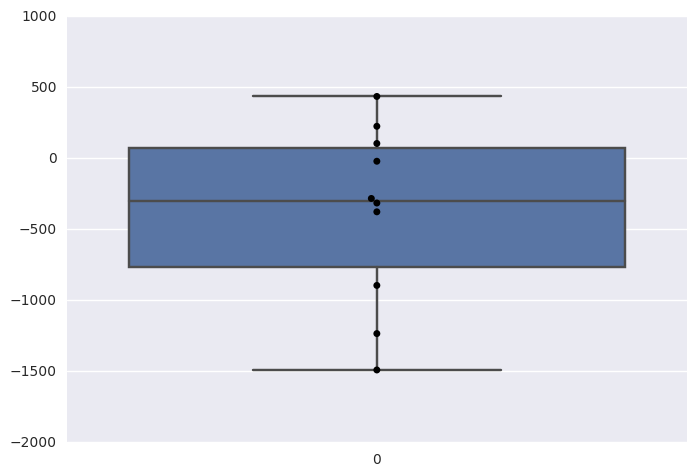

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

diff = exp['Difference']

ax = sns.boxplot(data=diff)
ax = sns.swarmplot(data=diff, color='.0')
plt.show()

The boxplot shows that the values tend to be negative, indicating people on puererin tended to drink less alcohol. The sample mean a -386.1 is lower than 0 (the value we would expect if there were no difference). But is this difference significant? Let's investigate normality of the distribution with a normal Q-Q plot:

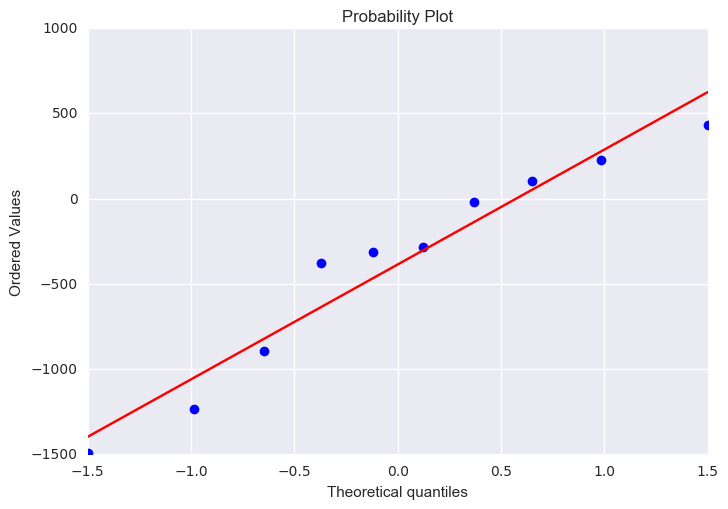

In [31]:
from scipy import stats as scistats

qq1 = scistats.probplot(diff, plot=plt)
plt.show()

A few points are a little extreme so we may not feel all that comfortable using the t-procedures, especially for such a small sample, gut we'll go ahead anyways to demonstrate the procedures.

##### Identify critical values for the sample mean at the $\alpha=0.05$ level
Let X = the difference in alcohol intake between Puerarin and placebo (Puerarin minus placebo)
    
Let $t^*$ = $t_{n-1 \text{ ,} 0.025}$ be the critical t-value

Let $SE(\bar{X})$ = $\frac{\hat{S}}{\sqrt{n}}$

The critical values on the t-distribution are found wherever the following is true:

$$|\bar{X} - \mu| > t^* * SE(\bar{X})$$

Note, $\mu$ is theorized to be zero under the null hypothesis, so:

$$|\bar{X} - 0| > t^* * SE(\bar{X})$$
$$|\bar{X}| > t^* * SE(\bar{X})$$

Noting that at the $\alpha = 0.05$ level, we are interested in the probability of extreme values at either end of the t-distribution with 9 degrees of freedom. This means that each end has a 0.025 probability, which leaves 0.95 in the middle. 

In [32]:
# calculate degrees of freedom
degrees_f = exp['Difference'].count() - 1
degrees_f

9

In [33]:
# find the critical t-value
t_val = scistats.t.ppf(1-0.025, degrees_f)
t_val

2.2621571627409915

In [34]:
# find the standard error
diff = exp['Difference']

from scipy import stats as scistats
stderr = scistats.sem(diff, ddof=1)
stderr

200.92593715651103

In [35]:
# find the mean difference
import numpy as np
mean_diff = np.mean(diff)
mean_diff

-386.1

In [36]:
# find the critical value for the sample mean
lower_critical = -1*t_val*stderr
upper_critical = t_val*stderr
print("lower critical value: %s" %round(lower_critical,4))
print("upper critical value: %s" %round(upper_critical,4))

lower critical value: -454.526
upper critical value: 454.526


Based on this interval at the $\alpha = 0.05$ level and our sample mean value of -386.1, there doesn't seem to be strong evidence as to the effect of Puererin. Constructing a confidence interval for the population mean difference between Puerarin and placebo (Puerarin minus placebo) should reveal the same.

##### Construct a 95% confidence interval for the population mean
The interval is constructed with the following statement:
$$\bar{X} - \mu \pm t^* * SE(\bar{X})$$

Note, $\mu$ is theorized to be zero under the null hypothesis, so:

$$\bar{X} - 0 \pm t^* * SE(\bar{X})$$
$$\bar{X} \pm t^* * SE(\bar{X})$$

In [37]:
# find the upper and lower bounds for the interval
lower_bound = mean_diff - (t_val * stderr)
upper_bound = mean_diff + (t_val * stderr)
print("lower bound: %s: " %round(lower_bound,4))
print("upper bound: %s: " %round(upper_bound,4))

lower bound: -840.626: 
upper bound: 68.426: 


So our 95% confidence interval is for $\mu$ is:
$$(-840.626, 68.426)$$

We can be 95% confident that $\mu$, the population mean difference in alcohol consumption, lies somewhere in this interval. In other words, we can be 95% confident that $\mu$, the true mean difference in alcohol consumption, lies between -841 grams and 68 grams. And so, according to this confidence interval, the true mean reduction in alcohol consumption when taking puererin could be as much as 841 grams, or an increase in consumption of 68 grams on average. Note, 0 is within this interval, so it is a plausible value for the difference. Based on this interval there isn't strong evidence on the effect of puererin. let's look more formally with a hypothesis test at the $\alpha = 0.05$ level to be sure.

##### Conduct the Hypothesis test
The hypothesis test is:
$$H_0: \mu=0 \text{ versus} H_1: \mu<0$$

Where $\mu$ is the population mean difference between placebo and puererin, and, if zero, indicates that Puererin has no significant effect. If less than zero with a significance at or below the $\alpha=0.05$ level, then the null hypothesis may be rejected.

To either accept or reject the null hypothesis a test statistic can be plotted on a t-distribution with n-1 degrees of freedom. If it has a p-value greater than the significance level of 0.05 then we will fail to reject the null hypothesis. If it is less than 0.05, then it is statistically significant and will allow us to reject the null hypothesis in favor of the alternative hypothesis. 

The test-statistic is calculated:
$$\text{t-stat}= \frac{\bar{X}-0}{SE(\bar{X})}$$

In [38]:
# calculate the test statistic
t_stat = (mean_diff - 0) / stderr
t_stat

-1.9216035792295341

In [39]:
# note the one-sided t-value is greater than our test statistic
t_val2 = -1 * scistats.t.ppf(1-0.05, 9)
t_val2

-1.8331129326536335

In [40]:
# calculate the p-value for the test statistic
p_val = 1 - scistats.t.sf(t_stat, 9)
p_val

0.04341657285404743

We know that just by looking at the value for a one-tailed significance of $\alpha = 0.05$ being at approx -1.833, that it's lower than our test-statistic. This is evidence enough to reject the null hypothesis.

On a t-distribution with 9 degrees of freedom, the p-value is fairly small at approximately 0.43, and less that the given significance value of 0.05. This means we have significant evidence against the null hypothesis at the 5% significance level. There is significant evidence that the population mean is less than 0. This means there is significant evidence that puerarin decreases beer consumption on average (with our one-sided p-value of 0.043).

Since this was a well-designed and randomized experiment, this gives evidence that puererin actually causes a reduction in alcohol consumption. Note that even though the 95% confidence interval for the mean difference between puerarin and placebo contained 0 (it was -841 to 68), we found in the hypothesis test that there was indeed a significant difference based on the p-value derived from plotting the t-statistic.

### Calculating Pearson's Correlation (pearson's r)

In [41]:
# step 1: standardize both variables
import pandas as pd

subway_df = pd.read_csv('sample-data/nyc_subway_weather.csv')
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [42]:
# pull out a single column as a pandas Series
tempi_col = subway_df.tempi
tempi_col.head()

0    55.9
1    52.0
2    62.1
3    57.9
4    52.0
Name: tempi, dtype: float64

In [43]:
# standardize the column as a vector operation
std_tempi_col = (tempi_col - tempi_col.mean()) / tempi_col.std(ddof=0)

# show the Series again
std_tempi_col.head()

0   -0.851964
1   -1.313202
2   -0.118713
3   -0.615432
4   -1.313202
Name: tempi, dtype: float64

In [44]:
# !!!note, numpy has a function that can calculate pearson's R
# make function to calculate the correlation
def correlation(x, y):
    # first standardize
    std_x = (x-x.mean()) / x.std(ddof=0)
    std_y = (y-y.mean()) / y.std(ddof=0)
    
    # multiply the two Series as a vectorized operation
    # take the mean of the resulting Series that was created
    return (std_x * std_y).mean()

In [45]:
# now use the function to calculate pearson's r for two coluns in sample data
correlation(subway_df['ENTRIESn_hourly'], subway_df['meanprecipi'])

0.03564851577223041

In [46]:
# now find two Series with a stronger correlation
correlation(subway_df['ENTRIESn_hourly'], subway_df['ENTRIESn'])

0.5858954707662182

Or, just use Pandas .corr()

In [47]:
subway_df[['ENTRIESn_hourly','ENTRIESn']].corr()

,ENTRIESn_hourly,ENTRIESn
ENTRIESn_hourly,1.000000,0.585895
ENTRIESn,0.585895,1.000000


# Choosing a Statistical Test

Dependent Variable is Continuous:
[Independent T-test](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php)
Dependent variable is continuous
Samples are Independent, meaning we are comparing the means of different samples. If this seems confusing, look at the converse – Dependent T-test definitions. An example might be if we were to test the significance of height between Males and Females. Obviously, the samples are different since one group are Males and the other are Females – they are independent.
Assumes normal distribution of the dependent variable
Population parameters are unavailable (usually less than 30 samples)
https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html

[Dependent T-test](https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php)
Dependent variable is continuous
Samples are Dependent, meaning we are comparing the means of the same samples. This is sometimes called a Paired test or before and after test because we are taking samples, measuring a result, then applying an effect, and measuring them after the effect to see if there are significant effects of the affect. There is one group and it is being tested twice.
Assumes normal distribution of the dependent variable
Population parameters are unavailable (usually less than 30 samples)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

[Mann Whitney U-test](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php)
Dependent variable is continuous
Does not assume normal distribution of the dependent variable
Often used in place of the Independent T-test when samples are not normal and as such, assumes the samples are Independent.
http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.mannwhitneyu.html

[Wilcoxon Signed-Rank Test](https://statistics.laerd.com/spss-tutorials/wilcoxon-signed-rank-test-using-spss-statistics.php)
Dependent variable is continuous
Does not assume normal distribution of the dependent variable
Often used in place of the Dependent T-test when samples are not normal and as such, assumes the samples are Dependent.
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.wilcoxon.html

[One-Way ANOVA Test](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php)
Dependent variable is continuous
Dependent variable is Normally Distributed (this needs to be determined before testing.
Typically used for 3+ Independent Variables (If 2 or less, the T-test should be performed since it is easier computationally and performs just as well).
http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.f_oneway.html

[Kruskal–Wallis Test](https://statistics.laerd.com/spss-tutorials/kruskal-wallis-h-test-using-spss-statistics.php)
Dependent variable is continuous
Similar to an ANOVA Test but for non-normal distributions (distribution still should be determined just in case a regular ANOVA test can be performed.)
Typically used for 3+ Independent Variables (If 2 or less, the Mann-Whitney U-test should be performed since it is easier computationally and performs just as well).
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.kruskalwallis.html

Dependent Variable is Categorical:

[Difference in Proportions Test](http://stattrek.com/hypothesis-test/difference-in-proportions.aspx)
Dependent variable is categorical
Typically used to compare the Dependent variable of 2 Independent-Variable Conditions
Usually involved creating a Contingency Table
http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.proportion.proportions_ztest.html#statsmodels.stats.proportion.proportions_ztest

[Chi-Squared Test](http://stattrek.com/chi-square-test/independence.aspx?Tutorial=AP)
Dependent variable is categorical
Typically used for 3+ Independent-Variable Conditions
Should be equivalent to the Difference in Proportions Test for less than 3 Conditions
Usually involved creating a Contingency Table
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

Choosing the Correct Test:
http://www.ats.ucla.edu/stat/stata/whatstat/

### Summary Statistics

In [49]:
# load and view dataframe
stroop = pd.read_csv('sample-data/stroopdata.csv')
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [50]:
# function calculates and presents summary statistics
stroop_summary = stroop.describe()
stroop_summary

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [51]:
# extract summary statistics
stroop_25th_percentile = stroop_summary.get_value('25%','Congruent')
stroop_25th_percentile

11.895250000000001